<a href="https://colab.research.google.com/github/KiranVarghese25/Predictive_analytics/blob/main/2348525_PA_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab -3

In [22]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Loading the dataset
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Checking for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
#Info about dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


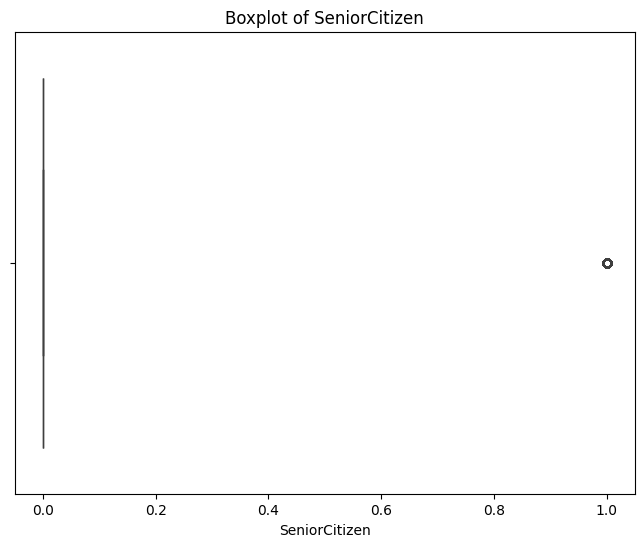

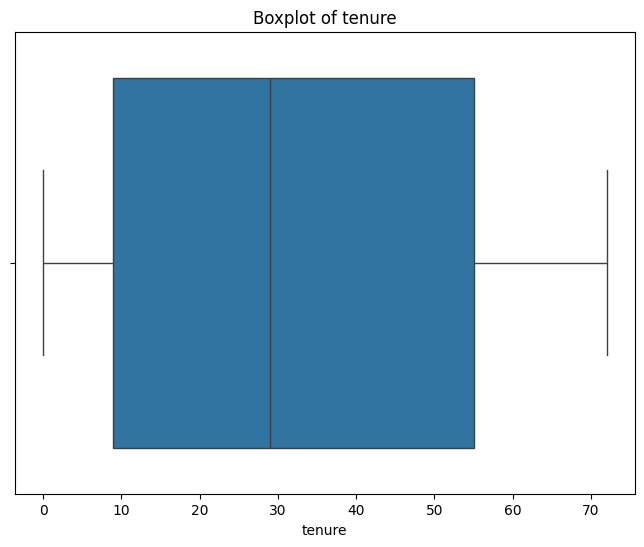

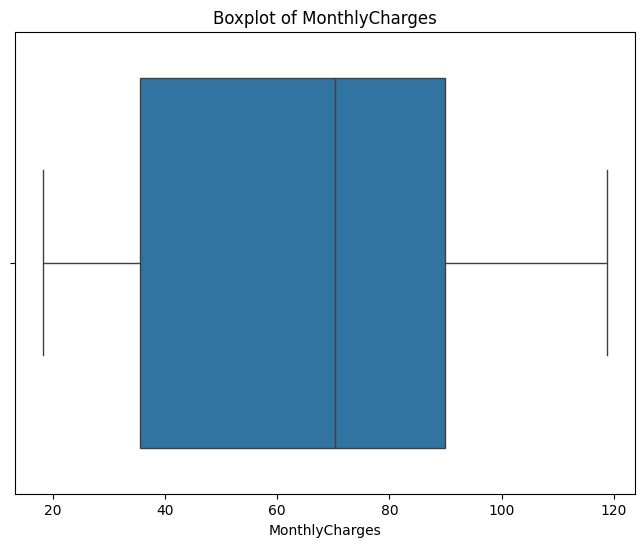

In [6]:
#Checking for outliers
for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

In [9]:
#Z score
z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
threshold = 3
outlier_rows=(z > threshold).any(axis=1)
df=df[~outlier_rows]
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df.shape)


Original DataFrame shape: (7043, 21)
DataFrame shape after removing outliers: (7043, 21)


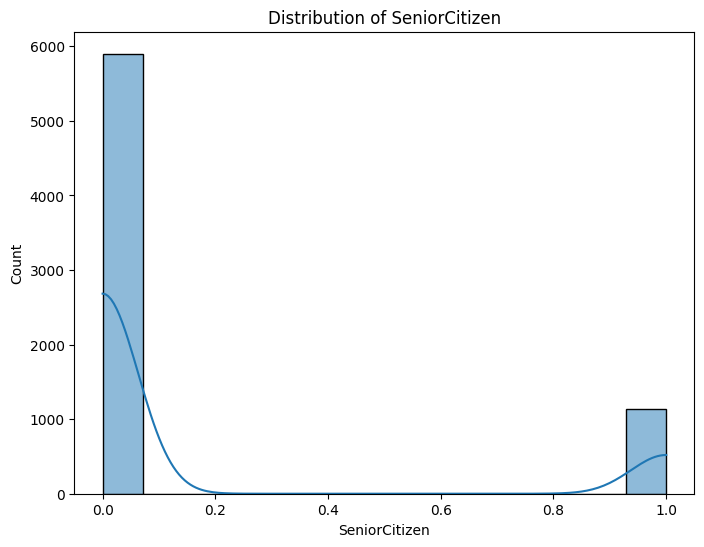

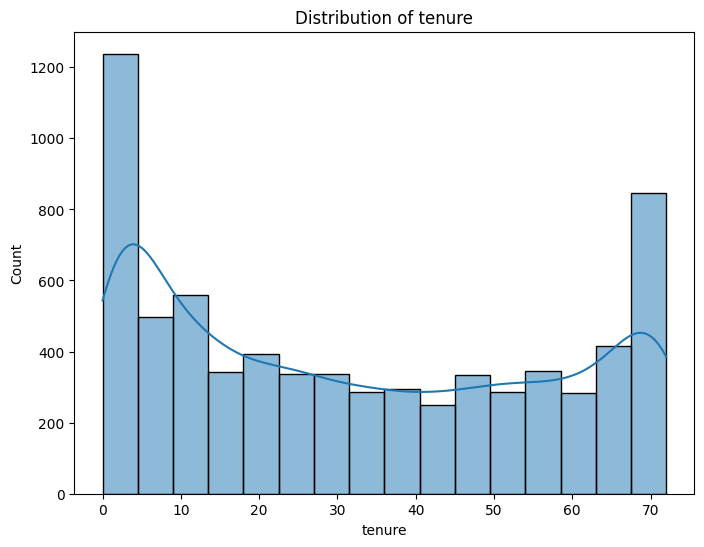

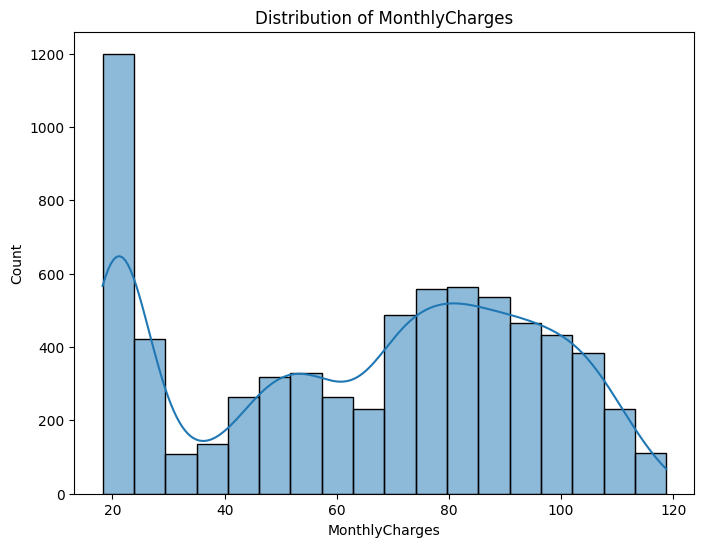

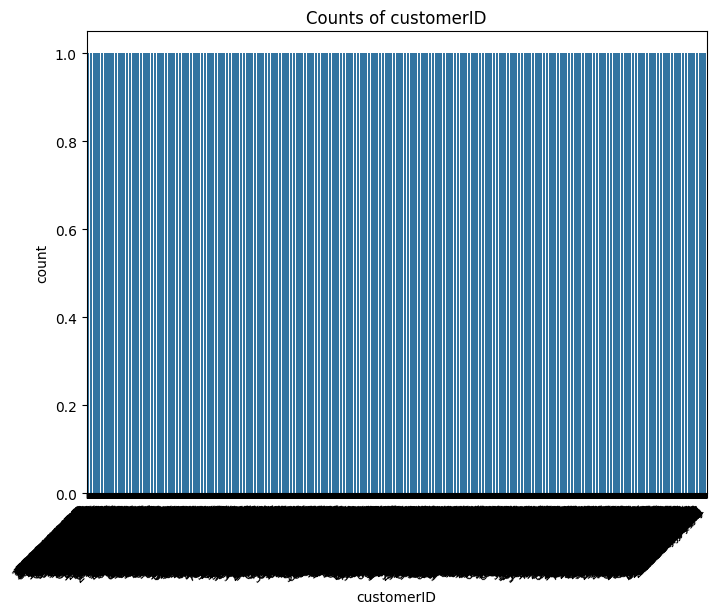

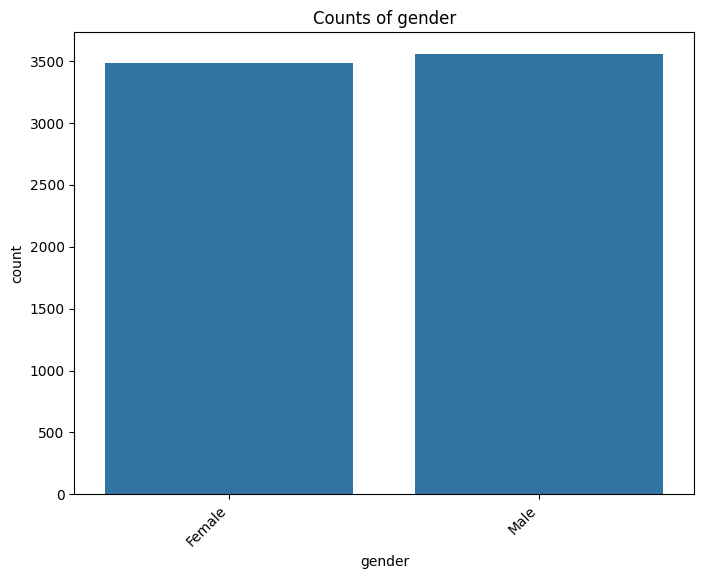

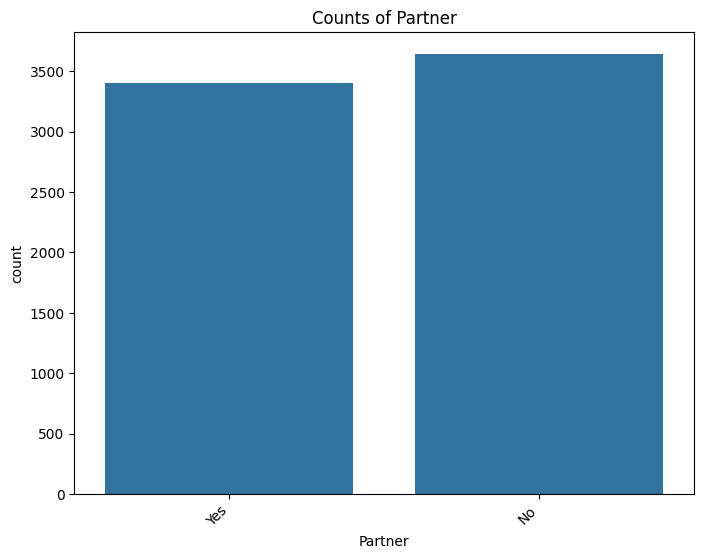

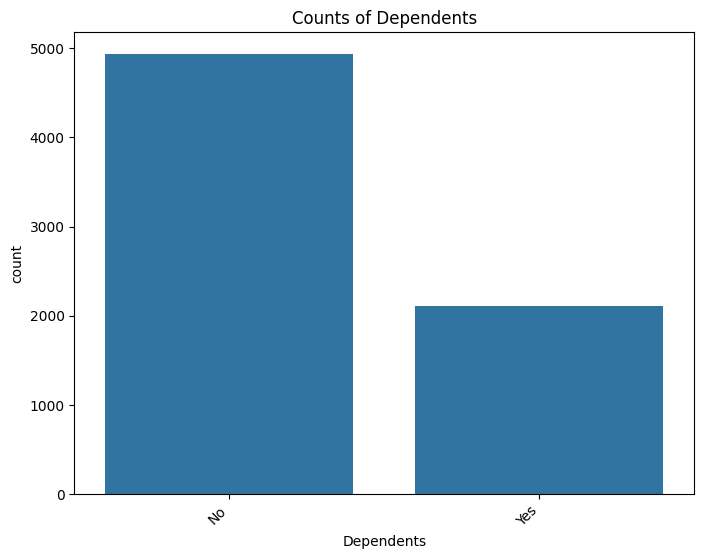

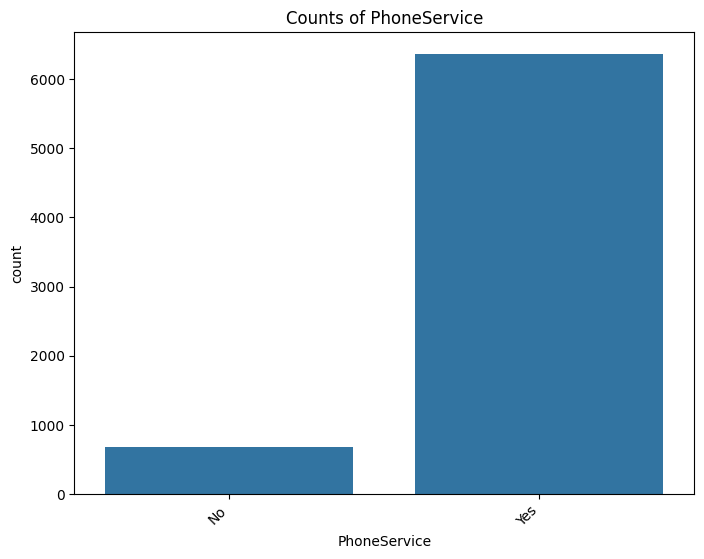

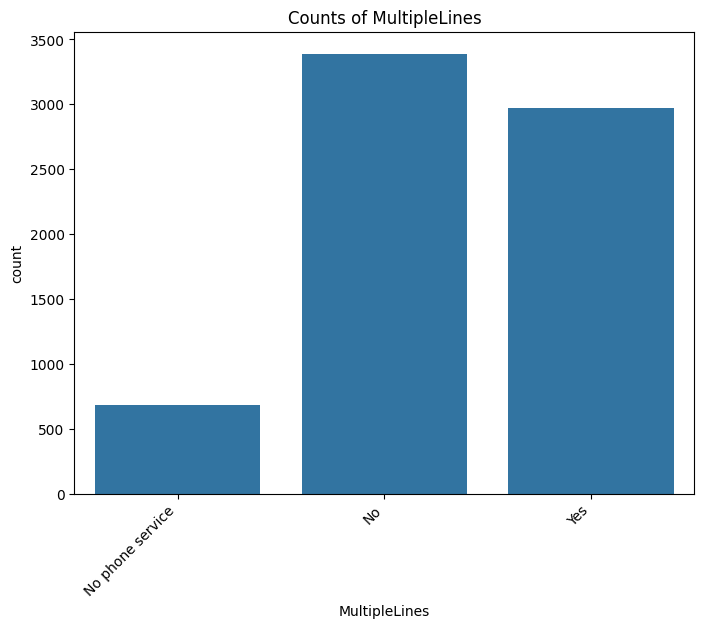

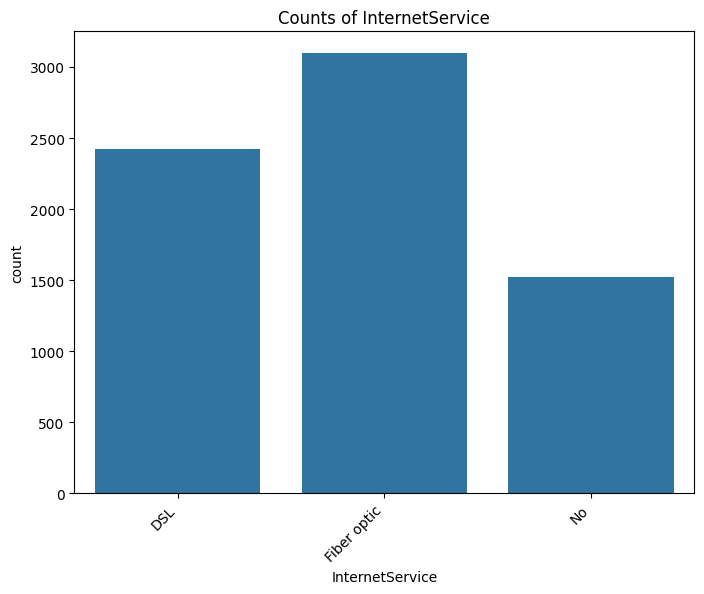

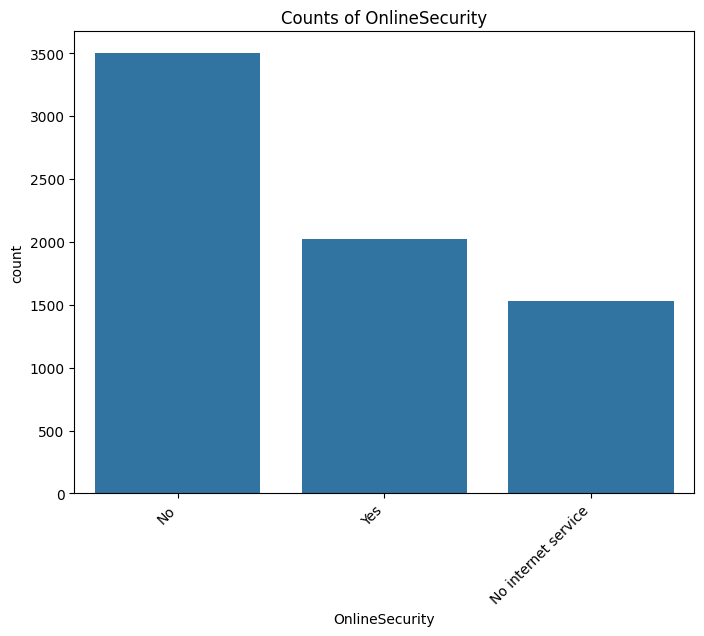

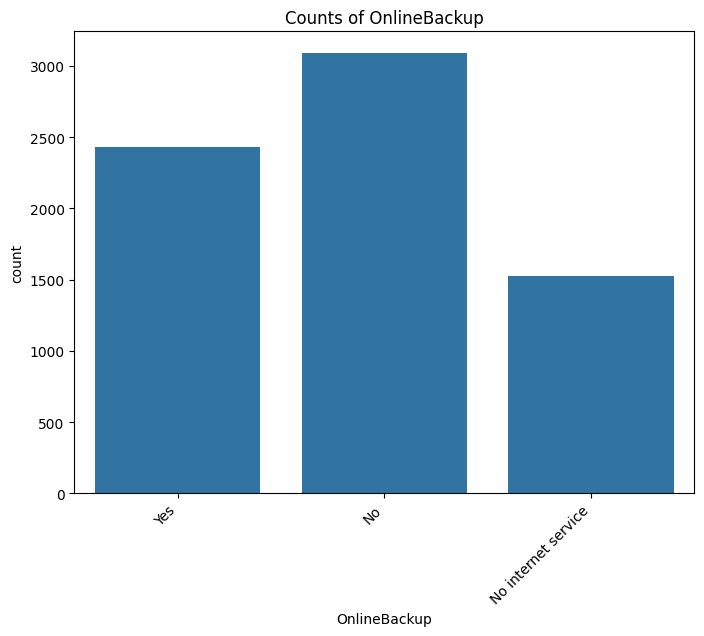

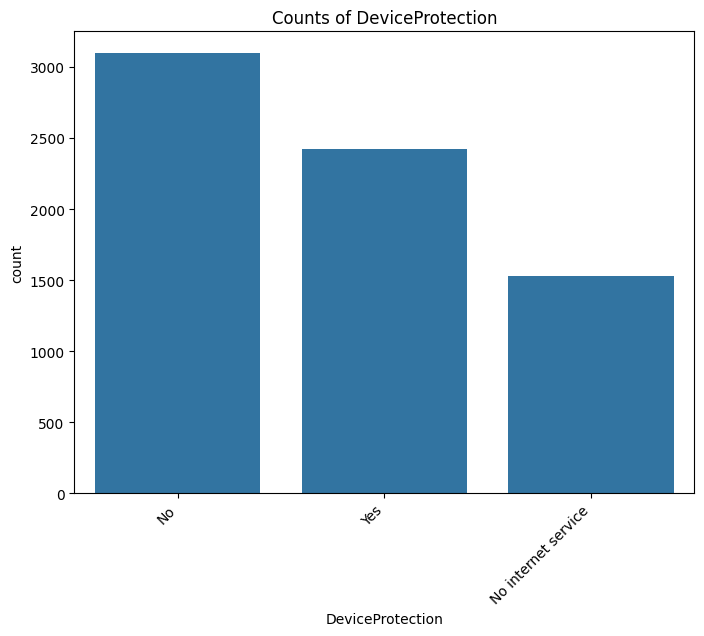

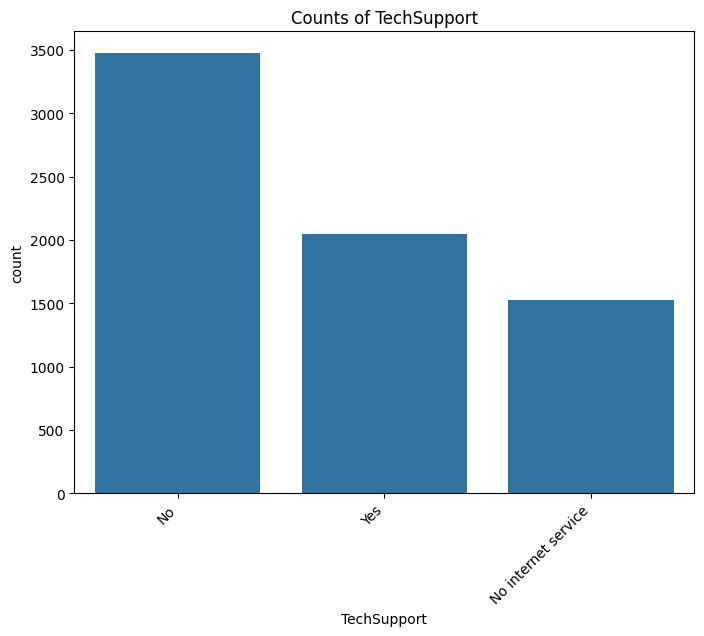

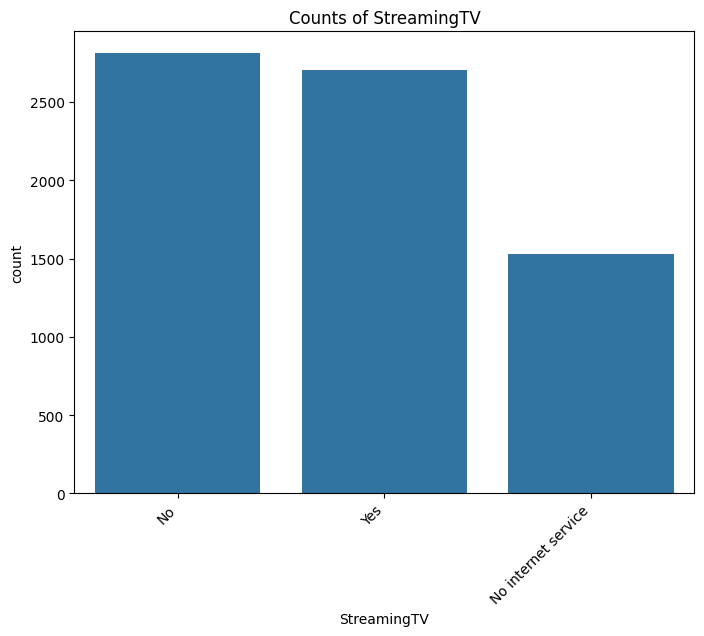

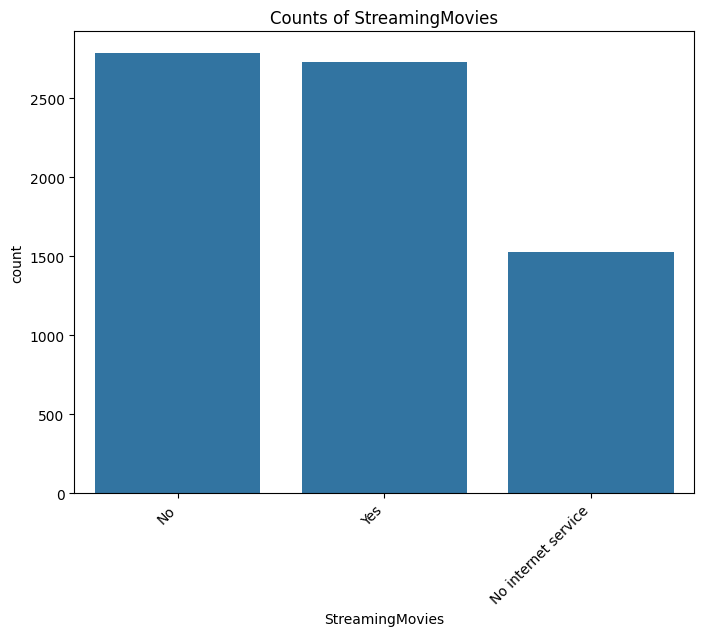

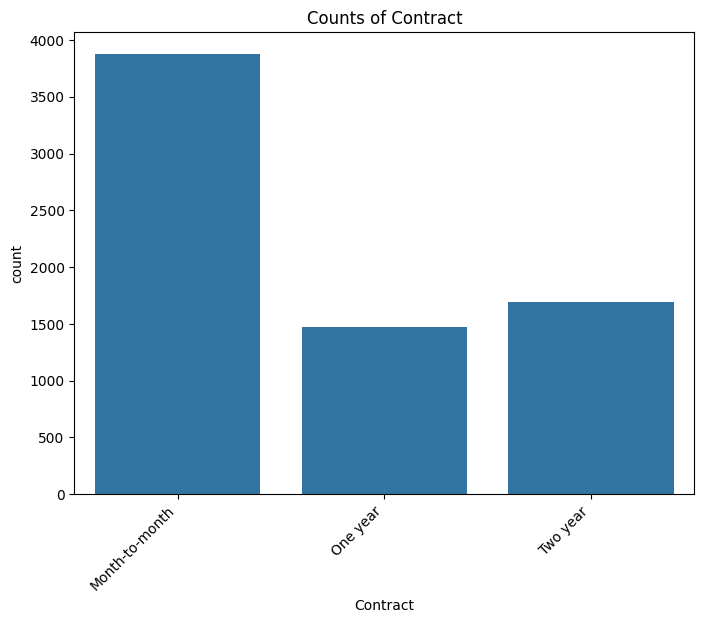

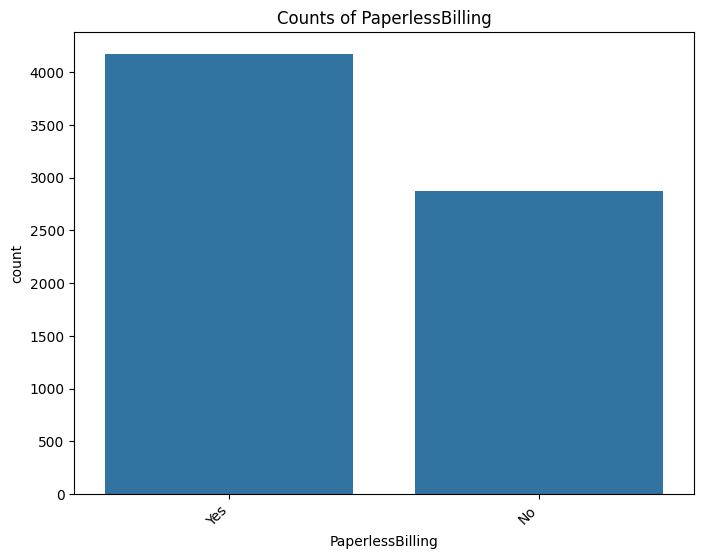

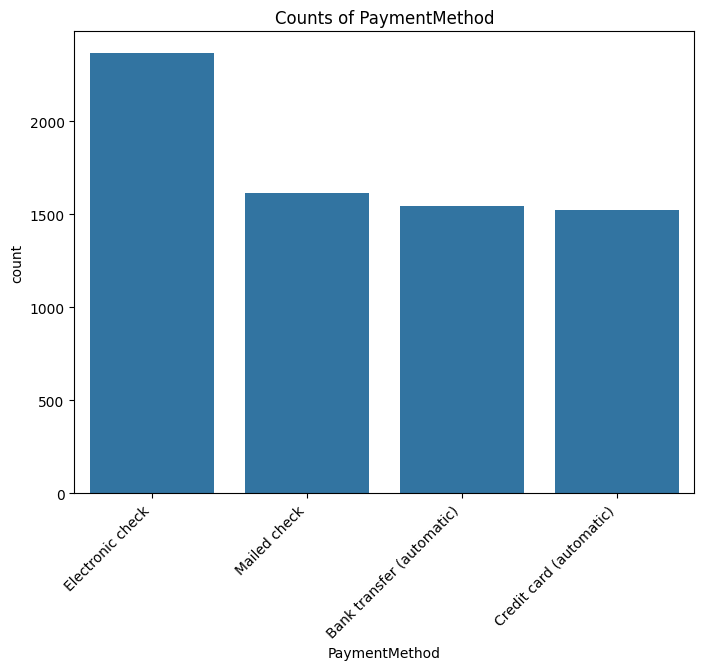

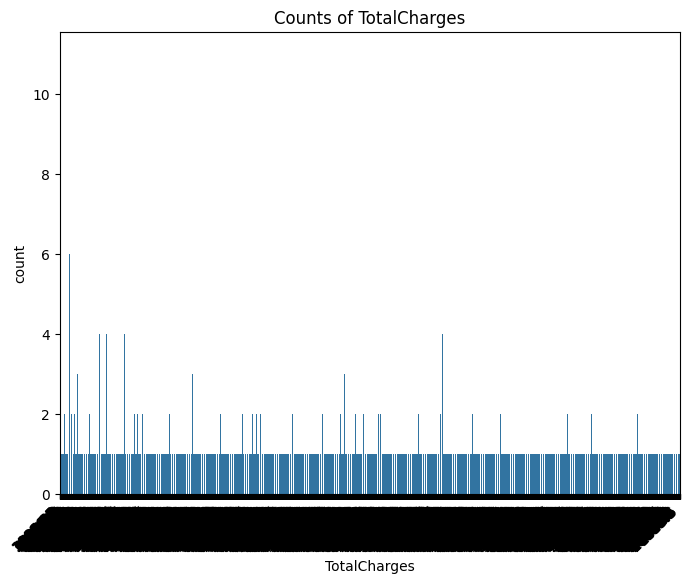

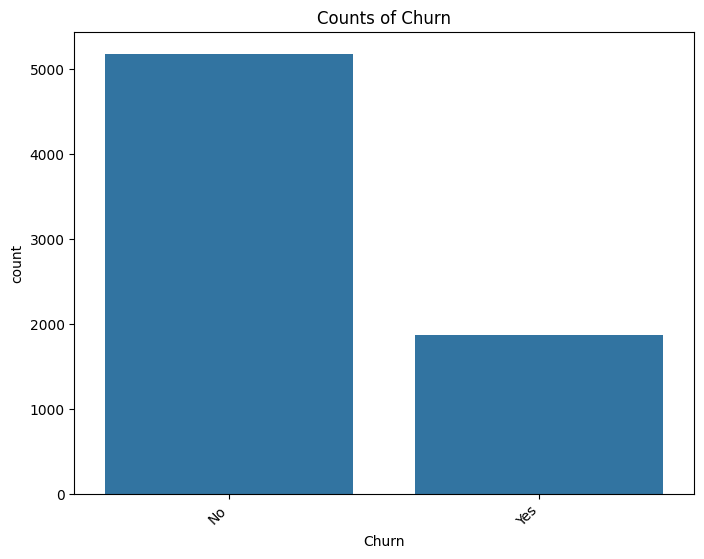

In [ ]:
for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.show()

for column in df.select_dtypes(include='object'):
  plt.figure(figsize=(8, 6))
  sns.countplot(x=df[column])
  plt.title(f"Counts of {column}")
  plt.xticks(rotation=45, ha='right')
  plt.show()
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

for column in df.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Churn', y=column, data=df)
  plt.title(f"Boxplot of {column} by Churn")
  plt.show()

for column in df.select_dtypes(include='object'):
  if column != 'Churn':
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f"Counts of {column} by Churn")
    plt.xticks(rotation=45, ha='right')
    plt.show()

correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [12]:
#Encoding
le = LabelEncoder()

for column in df.select_dtypes(include='object'):
  if column != 'customerID':
    df[column] = le.fit_transform(df[column])
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [14]:
#Scaling data
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG     0.0            0.0      1.0         0.0  0.013889   
1  5575-GNVDE     1.0            0.0      0.0         0.0  0.472222   
2  3668-QPYBK     1.0            0.0      0.0         0.0  0.027778   
3  7795-CFOCW     1.0            0.0      0.0         0.0  0.625000   
4  9237-HQITU     0.0            0.0      0.0         0.0  0.027778   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0           0.0            0.5              0.0             0.0  ...   
1           1.0            0.0              0.0             1.0  ...   
2           1.0            0.0              0.0             1.0  ...   
3           0.0            0.5              0.0             1.0  ...   
4           1.0            0.0              0.5             0.0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0  

In [16]:
#Declaring the features and target variable
x=df.drop(['customerID','Churn'],axis=1)
Y=df['Churn']

In [18]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=42)


In [21]:
#Model 1 - SVM
svm_model = SVC(kernel='linear')  # You can choose different kernels (e.g., 'rbf', 'poly')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nF1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8059630856601988

F1 Score: 0.6042471042471043

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1539
         1.0       0.68      0.55      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113


Confusion Matrix:
 [[1390  149]
 [ 261  313]]


In [23]:
# Model 2 - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest F1 Score:", f1_rf)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7960246095598675

Random Forest F1 Score: 0.564206268958544

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1539
         1.0       0.67      0.49      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.78      2113


Random Forest Confusion Matrix:
 [[1403  136]
 [ 295  279]]


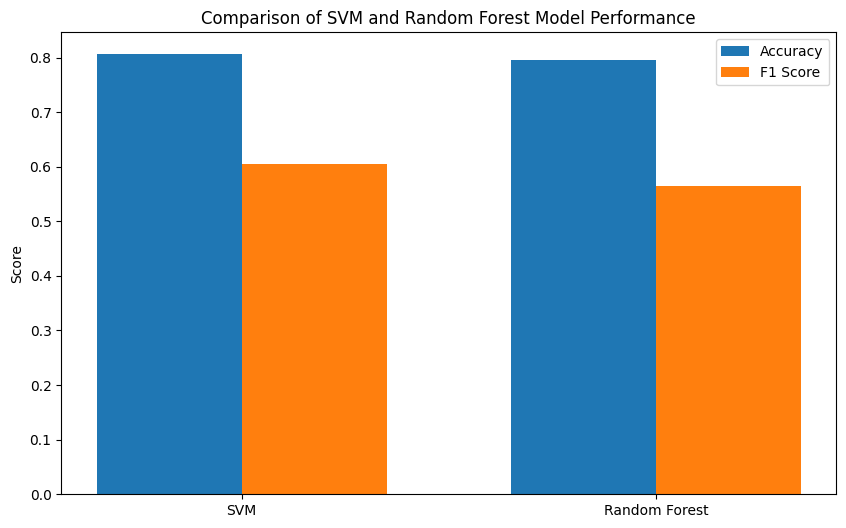

In [24]:
# Model performance comparison
model_names = ['SVM', 'Random Forest']
accuracies = [accuracy, accuracy_rf]
f1_scores = [f1, f1_rf]

plt.figure(figsize=(10, 6))
bar_width = 0.35
x_pos = np.arange(len(model_names))

plt.bar(x_pos - bar_width / 2, accuracies, width=bar_width, label='Accuracy')
plt.bar(x_pos + bar_width / 2, f1_scores, width=bar_width, label='F1 Score')

plt.xticks(x_pos, model_names)
plt.ylabel('Score')
plt.title('Comparison of SVM and Random Forest Model Performance')
plt.legend()
plt.show()


# Infernce
Conducted a thorough analysis of the telecom customer churn dataset, starting with data preprocessing to ensure quality, including Z-score normalization to standardize the values. I performed both univariate and bivariate analyses to explore relationships between variables and identified key factors affecting churn. After scaling the dataset, I split it into training and testing sets, and I built two predictive models: Support Vector Machine (SVM) and Random Forest. The SVM model achieved a slightly higher accuracy of 81%, while the Random Forest model reached an accuracy of 80%. Additionally, the SVM outperformed in terms of F1 Score, indicating a better balance between precision and recall for the churn prediction. Despite these positive outcomes, I observed that the F1 Score values suggest there is room for improvement in accurately capturing churn behavior. Moving forward, I plan to focus on further model tuning, exploring additional features, and potentially incorporating more advanced algorithms to enhance prediction performance and gain deeper insights into the factors influencing customer churn.